# Correlation study for pageviews between movies and general knowledge topics

In this notebook we provide the code to obtain the pageview information of different movies and science/historical/general topics present in their wikipedia article. Then we also provide the results for a correlation study between these variables.

Our idea is to define how the release of some films can affect the curiosity of the viewers and make them investigate further on specific topics. For example, entropy is a very general scientific topic but it is highly correlated to the pageviews on the movie Tenet.

We could only do the study for movies released after 2015. We usually focus on the time frame that starts 1-2 months before the release of the movie and lasts up until a year later.

SUMMARY OF THE RESULTS:

For science/technology/sci-fi topics in movies we find some succesful results (Tenet and entropy, Arrival and palindrome) but also find no results for other movies, probably because the term is either too general, too popular or both (The Martian, Blade Runner 2049 and Spider-Man).

The case of The Martian is curious because Mars got a lot of visits a day before the release of The Martian because of the discovery of running water on the planet around that date, which changed the behaviour in the wikipedia visits.

We find high correlation between historically based/inspired movies and the specific individuals, places and explanations regarding the original topic. This is the case for the movies The Two Popes, The Trial of the Chicago 7, Once Upon a Time in Hollywood, 1917 and The Queen's Gambit. In some cases the link was very direct (the main character was a public figure) and some times the link is not that obvious (for example, the Black Panther Party page and The Trial of the Chicago 7 movie, where it is mentioned but it is not the central topic, and the Manson Family in Once Upon a Time in Hollywood, which are not directly mentioned but are a strong inspiration ). 




## Installs and function to get pageviews

In [ ]:
!pip install pageviewapi
!pip install mwparserfromhell

In [ ]:
import pageviewapi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def getPageviewsDaily(page,project='en.wikipedia',start_date='20150902',end_date='20160902'):
  views = pageviewapi.per_article(project, page, start_date,end_date,
                        access='all-access', agent='all-agents', granularity='daily')
  views = pd.DataFrame(views['items'])
  views.index = pd.to_datetime(views['timestamp'],format='%Y%m%d%H')
  return views[['article','views']]

## The Martian

The peak for Mars is the news of water found on Mars.

<Figure size 432x288 with 0 Axes>

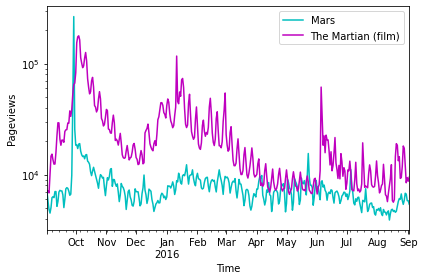

In [ ]:
page1= 'Mars'
page1_views = getPageviewsDaily(page1,start_date='20150902',end_date='20160902')
page2 = 'The Martian (film)'
page2_views = getPageviewsDaily(page2,start_date='20150902',end_date='20160902')

plt.figure()
ax = page1_views.plot(y='views',label= 'Mars',c='c')
page2_views.plot(y='views',ax=ax, label='The Martian (film)',c='m')
plt.ylabel('Pageviews')
plt.yscale("log")
plt.tight_layout()
plt.xlabel('Time')
plt.savefig('Martian.png')
martian = page1_views.join(page2_views,lsuffix='1')
martian.to_csv('Martian_pageviews.csv')


In [ ]:
martian.corr('pearson')

,views1,views
views1,1.000000,0.228303
views,0.228303,1.000000


In [ ]:
martian.corr('spearman')

,views1,views
views1,1.000000,0.484461
views,0.484461,1.000000


## Tenet

<Figure size 432x288 with 0 Axes>

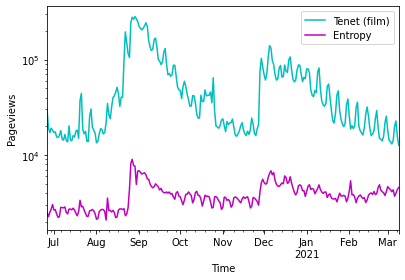

In [ ]:
page1= 'Tenet (film)'
page1_views = getPageviewsDaily(page1,start_date='20200626',end_date='20210309')
page2 = 'Entropy'
page2_views = getPageviewsDaily(page2,start_date='20200626',end_date='20210309')

plt.figure()
ax = page1_views.plot(y='views',label= 'Tenet (film)',c='c')
page2_views.plot(y='views',ax=ax, label='Entropy',c='m')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.tight_layout()
plt.yscale("log")
plt.savefig('Tenet.png')
tenet = page1_views.join(page2_views,lsuffix='1')
tenet.to_csv('Tenet_pageviews.csv')

In [ ]:
tenet.corr('pearson')

,views1,views
views1,1.000000,0.730934
views,0.730934,1.000000


In [ ]:
tenet.corr('spearman')

,views1,views
views1,1.000000,0.584351
views,0.584351,1.000000


## Black Mirror: Bandersnatch

<Figure size 432x288 with 0 Axes>

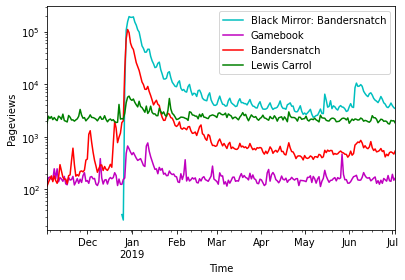

In [ ]:
page1= 'Black Mirror: Bandersnatch'
page1_views = getPageviewsDaily(page1,start_date='20181103',end_date='20190703')
page2 = 'Gamebook'
page2_views = getPageviewsDaily(page2,start_date='20181103',end_date='20190703')
page3 = 'Bandersnatch'
page3_views = getPageviewsDaily(page3,start_date='20181103',end_date='20190703')
page4 = 'Lewis Carroll'
page4_views = getPageviewsDaily(page4,start_date='20181103',end_date='20190703')

plt.figure()
ax = page1_views.plot(y='views',label= 'Black Mirror: Bandersnatch',c='c')
page2_views.plot(y='views',ax=ax, label='Gamebook',c='m')
page3_views.plot(y='views',ax=ax, label='Bandersnatch',c='r')
page4_views.plot(y='views',ax=ax, label='Lewis Carrol',c='g')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.tight_layout()
plt.yscale("log")
plt.savefig('BM.png')
bm = page1_views.join(page2_views,lsuffix='_game')
bm = bm.join(page3_views,lsuffix='_band')
bm = bm.join(page4_views,lsuffix='_lc')
bm.to_csv('br_pageviews.csv')

In [ ]:
bm.corr('pearson')

,views_game,views_band,views_lc,views
views_game,1.000000,0.765949,0.880774,0.858114
views_band,0.765949,1.000000,0.704952,0.729142
views_lc,0.880774,0.704952,1.000000,0.794274
views,0.858114,0.729142,0.794274,1.000000


In [ ]:
bm.corr('spearman')

,views_game,views_band,views_lc,views
views_game,1.000000,0.501186,0.885607,0.546402
views_band,0.501186,1.000000,0.460666,0.412595
views_lc,0.885607,0.460666,1.000000,0.668753
views,0.546402,0.412595,0.668753,1.000000


## The Queen's gambit (series)

<Figure size 432x288 with 0 Axes>

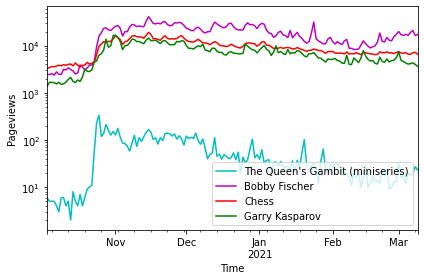

In [ ]:
page1= 'The Queen\'s Gambit'
page1_views = getPageviewsDaily(page1,start_date='20201003',end_date='20210310')
page2 = 'Bobby Fischer'
page2_views = getPageviewsDaily(page2,start_date='20201003',end_date='20210310')
page3 = 'Chess'
page3_views = getPageviewsDaily(page3,start_date='20201003',end_date='20210310')
page4 = 'Garry Kasparov'
page4_views = getPageviewsDaily(page4,start_date='20201003',end_date='20210310')

plt.figure()
ax = page1_views.plot(y='views',label= 'The Queen\'s Gambit (miniseries)',c='c')
page2_views.plot(y='views',ax=ax, label='Bobby Fischer',c='m')
page3_views.plot(y='views',ax=ax, label='Chess',c='r')
page4_views.plot(y='views',ax=ax, label='Garry Kasparov',c='g')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log")
plt.tight_layout()
plt.legend(loc='lower right')
plt.savefig('queens.png')
qg = page1_views.join(page2_views,lsuffix='_fish')
qg = qg.join(page3_views,lsuffix='_chess')
qg = qg.join(page4_views,lsuffix='_kasp')
qg.to_csv('br_pageviews.csv')

In [ ]:
qg.corr('pearson')

,views_fish,views_chess,views_kasp,views
views_fish,1.000000,0.577085,0.717503,0.698208
views_chess,0.577085,1.000000,0.901847,0.847939
views_kasp,0.717503,0.901847,1.000000,0.953984
views,0.698208,0.847939,0.953984,1.000000


## Blade Runner 2049

<Figure size 432x288 with 0 Axes>

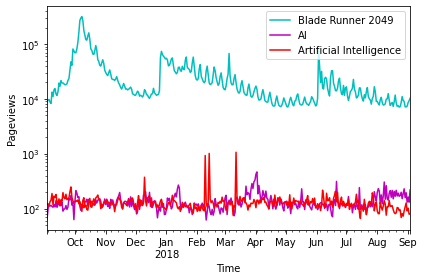

In [ ]:
page1= 'Blade Runner 2049'
page1_views = getPageviewsDaily(page1,start_date='20170903',end_date='20180903')
page2 = 'AI'
page2_views = getPageviewsDaily(page2,start_date='20170903',end_date='20180903')
page3 = 'Artificial Intelligence'
page3_views = getPageviewsDaily(page3,start_date='20170903',end_date='20180903')

plt.figure()
ax = page1_views.plot(y='views',label= 'Blade Runner 2049',c='c')
page2_views.plot(y='views',ax=ax, label='AI',c='m')
page3_views.plot(y='views',ax=ax, label='Artificial Intelligence',c='r')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log")
plt.tight_layout()
plt.savefig('bladerunner.png')
blade_runner = page1_views.join(page2_views,lsuffix='_ai')
blade_runner = blade_runner.join(page3_views,lsuffix='_artint')
blade_runner.to_csv('br_pageviews.csv')

In [ ]:
blade_runner.corr('spearman')

,views_ai,views_artint,views
views_ai,1.000000,-0.223800,0.037514
views_artint,-0.223800,1.000000,0.025818
views,0.037514,0.025818,1.000000


In [ ]:
blade_runner.corr('pearson')

,views_ai,views_artint,views
views_ai,1.000000,-0.107745,-0.022426
views_artint,-0.107745,1.000000,-0.024079
views,-0.022426,-0.024079,1.000000


In [ ]:
blade_runner.corr('kendall')

,views_ai,views_artint,views
views_ai,1.000000,-0.148740,0.027061
views_artint,-0.148740,1.000000,0.017761
views,0.027061,0.017761,1.000000


## Arrival

<Figure size 432x288 with 0 Axes>

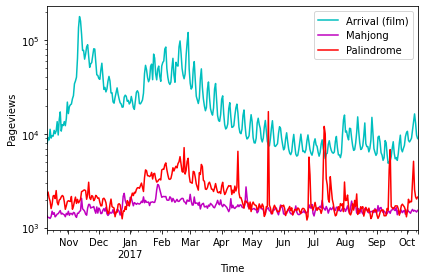

In [ ]:
page1= 'Arrival (film)'
page1_views = getPageviewsDaily(page1,start_date='20161011',end_date='20171011')
page2 = 'Mahjong'
page2_views = getPageviewsDaily(page2,start_date='20161011',end_date='20171011')
page3 = 'Palindrome'
page3_views = getPageviewsDaily(page3,start_date='20161011',end_date='20171011')

plt.figure()
ax = page1_views.plot(y='views',label= 'Arrival (film)',c='c')
page2_views.plot(y='views',ax=ax, label='Mahjong',c='m')
page3_views.plot(y='views',ax=ax, label='Palindrome',c='r')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log")
plt.tight_layout()
plt.savefig('arrival.png')
arrival = page1_views.join(page2_views,lsuffix='_mah')
arrival = arrival.join(page3_views,lsuffix='_pal')
arrival.to_csv('arrival_pageviews.csv')

In [ ]:
arrival.corr('pearson')

,views_mah,views_pal,views
views_mah,1.000000,0.338556,0.285451
views_pal,0.338556,1.000000,0.355137
views,0.285451,0.355137,1.000000


In [ ]:
arrival.corr('spearman')

,views_mah,views_pal,views
views_mah,1.000000,0.412353,0.542111
views_pal,0.412353,1.000000,0.557777
views,0.542111,0.557777,1.000000


## Spider-Man:Into the Spider Verse

<Figure size 432x288 with 0 Axes>

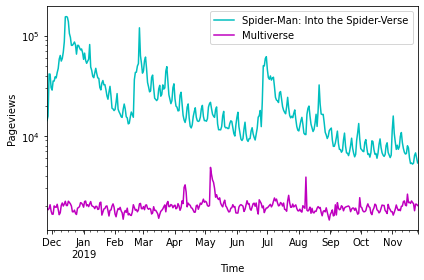

In [ ]:
page1= 'Spider-Man: Into the Spider-Verse'
page1_views = getPageviewsDaily(page1,start_date='20181126',end_date='20191126')
page2 = 'Multiverse'
page2_views = getPageviewsDaily(page2,start_date='20181126',end_date='20191126')

plt.figure()
ax = page1_views.plot(y='views',label= 'Spider-Man: Into the Spider-Verse',c='c')
page2_views.plot(y='views',ax=ax, label='Multiverse',c='m')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log")
plt.tight_layout()
plt.savefig('spiderman.png')
spiderman = page1_views.join(page2_views,lsuffix='1')
spiderman.to_csv('Spiderman_pageviews.csv')

In [ ]:
spiderman.corr('pearson')

,views1,views
views1,1.00000,0.01585
views,0.01585,1.00000


In [ ]:
spiderman.corr('spearman')

,views1,views
views1,1.000000,0.041934
views,0.041934,1.000000


## 1917

<Figure size 432x288 with 0 Axes>

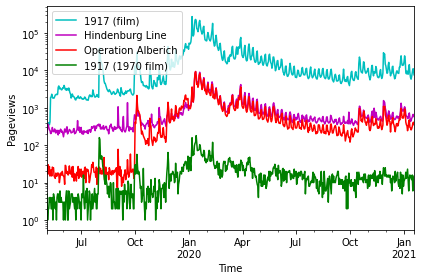

In [ ]:
page1= '1917 (2019 film)'
page1_views = getPageviewsDaily(page1,start_date='20190504',end_date='20210118')
page2 = 'Hindenburg Line'
page2_views = getPageviewsDaily(page2,start_date='20190504',end_date='20210118')
page3 = 'Operation Alberich'
page3_views = getPageviewsDaily(page3,start_date='20190504',end_date='20210118')
page4 = '1917 (film)'
page4_views = getPageviewsDaily(page4,start_date='20190504',end_date='20210118')

plt.figure()
ax = page1_views.plot(y='views',label= '1917 (film)',c='c')
page2_views.plot(y='views',ax=ax, label='Hindenburg Line',c='m')
page3_views.plot(y='views',ax=ax, label='Operation Alberich',c='r')
page4_views.plot(y='views',ax=ax, label='1917 (1970 film)',c='g')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log") 
plt.tight_layout()
plt.savefig('1917.png')
war = page1_views.join(page2_views,lsuffix='_hin')
war = war.join(page3_views,lsuffix='_alb')
war = war.join(page4_views,lsuffix= '_movie')
war.to_csv('war_pageviews.csv')

In [ ]:
war.corr('pearson')

,views_hin,views_alb,views_movie,views
views_hin,1.000000,0.936615,0.946737,0.845721
views_alb,0.936615,1.000000,0.985989,0.754158
views_movie,0.946737,0.985989,1.000000,0.767411
views,0.845721,0.754158,0.767411,1.000000


In [ ]:
war.corr('spearman')

,views_hin,views_alb,views_movie,views
views_hin,1.000000,0.924919,0.950565,0.818827
views_alb,0.924919,1.000000,0.949613,0.758672
views_movie,0.950565,0.949613,1.000000,0.772611
views,0.818827,0.758672,0.772611,1.000000


## Once upon a time in hollywood

<Figure size 432x288 with 0 Axes>

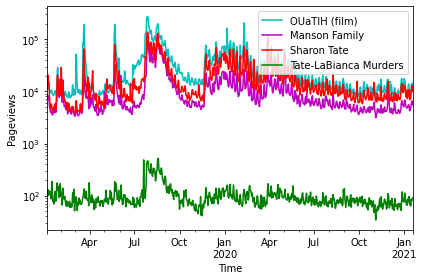

In [ ]:
page1= 'Once Upon a Time in Hollywood'
page1_views = getPageviewsDaily(page1,start_date='20190104',end_date='20210118')
page2 = 'Manson Family'
page2_views = getPageviewsDaily(page2,start_date='20190104',end_date='20210118')
page3 = 'Sharon Tate'
page3_views = getPageviewsDaily(page3,start_date='20190104',end_date='20210118')
page4 = 'Tate-LaBianca murders'
page4_views = getPageviewsDaily(page4,start_date='20190104',end_date='20210118')

plt.figure()
ax = page1_views.plot(y='views',label= 'OUaTIH (film)',c='c')
page2_views.plot(y='views',ax=ax, label='Manson Family',c='m')
page3_views.plot(y='views',ax=ax, label='Sharon Tate',c='r')
page4_views.plot(y='views',ax=ax, label='Tate-LaBianca Murders',c='g')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log") 
plt.tight_layout()
plt.savefig('once.png')
once = page1_views.join(page2_views,lsuffix='_man')
once = once.join(page3_views,lsuffix='_sh')
once = once.join(page4_views,lsuffix= '_tate')
once.to_csv('once_pageviews.csv')

In [ ]:
once.corr('pearson')

,views_man,views_sh,views_tate,views
views_man,1.000000,0.881219,0.929655,0.787739
views_sh,0.881219,1.000000,0.930066,0.898115
views_tate,0.929655,0.930066,1.000000,0.803576
views,0.787739,0.898115,0.803576,1.000000


In [ ]:
once.corr('spearman')

,views_man,views_sh,views_tate,views
views_man,1.000000,0.869284,0.887996,0.559443
views_sh,0.869284,1.000000,0.944665,0.677359
views_tate,0.887996,0.944665,1.000000,0.614676
views,0.559443,0.677359,0.614676,1.000000


## The trial of the chicago seven

<Figure size 432x288 with 0 Axes>

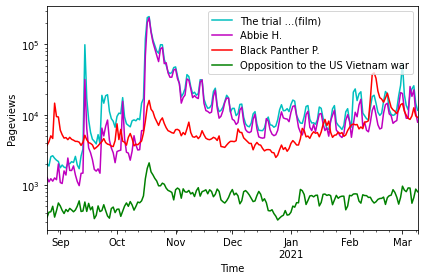

In [ ]:
page1= 'The Trial of the Chicago 7'
page1_views = getPageviewsDaily(page1,start_date='20200825',end_date='20210903')
page2 = 'Abbie Hoffman'
page2_views = getPageviewsDaily(page2,start_date='20200825',end_date='20210903')
page3 = 'Black Panther Party'
page3_views = getPageviewsDaily(page3,start_date='20200825',end_date='20210903')
page4 = 'Opposition to United States involvement in the Vietnam War'
page4_views = getPageviewsDaily(page4,start_date='20200825',end_date='20210903')

plt.figure()
ax = page1_views.plot(y='views',label= 'The trial ...(film)',c='c')
page2_views.plot(y='views',ax=ax, label='Abbie H.',c='m')
page3_views.plot(y='views',ax=ax, label='Black Panther P.',c='r')
page4_views.plot(y='views',ax=ax, label='Opposition to the US Vietnam war',c='g')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log") 
plt.tight_layout()
plt.savefig('Seven.png')
seven = page1_views.join(page2_views,lsuffix='_abbie')
seven = seven.join(page3_views,lsuffix='_bpp')
seven = seven.join(page4_views,lsuffix= '_op')
seven.to_csv('once_pageviews.csv')

In [ ]:
seven.corr('pearson')

,views_abbie,views_bpp,views_op,views
views_abbie,1.000000,0.977584,0.226616,0.778702
views_bpp,0.977584,1.000000,0.216971,0.801739
views_op,0.226616,0.216971,1.000000,0.247541
views,0.778702,0.801739,0.247541,1.000000


In [ ]:
seven.corr('spearman')

,views_abbie,views_bpp,views_op,views
views_abbie,1.000000,0.926516,0.403532,0.495436
views_bpp,0.926516,1.000000,0.385387,0.583555
views_op,0.403532,0.385387,1.000000,0.522153
views,0.495436,0.583555,0.522153,1.000000


## The two popes

<Figure size 432x288 with 0 Axes>

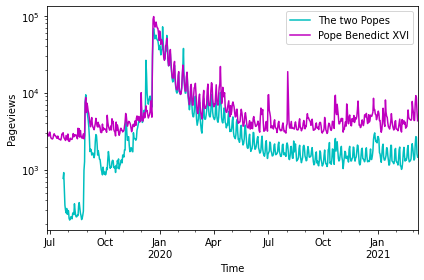

In [ ]:
page1= 'The Two Popes'
page1_views = getPageviewsDaily(page1,start_date='20190626',end_date='20210309')
page2 = 'Pope Benedict XVI'
page2_views = getPageviewsDaily(page2,start_date='20190626',end_date='20210309')

plt.figure()
ax = page1_views.plot(y='views',label= 'The two Popes',c='c')
page2_views.plot(y='views',ax=ax, label='Pope Benedict XVI',c='m')
plt.ylabel('Pageviews')
plt.xlabel('Time')
plt.yscale("log")
plt.tight_layout()
plt.savefig('2popes.png')
two = page1_views.join(page2_views,lsuffix='1')
two.to_csv('Two_pageviews.csv')

In [ ]:
two.corr('pearson')

,views1,views
views1,1.000000,0.948885
views,0.948885,1.000000


In [ ]:
two.corr('spearman')

,views1,views
views1,1.000000,0.842127
views,0.842127,1.000000


# Possible options to automatize the way to obtain links.

A way to expand this part of the project would be checking the pageviews of the redirected links in the page. However, due to time scope and the fact that our project has specific targets, we considered better to obtain the links manually.

In [ ]:
## Parsing Wikipedia Content
import requests
def get_whatlinks(page,project='en.wikipedia'):
    whatLinks = []
    url = "https://{project}.org/w/api.php?action=query&format=json&list=backlinks&bltitle={page}&bllimit=500&blnamespace=0".format(project=project,page=page)
    response = requests.get(url=url).json()
    whatLinks.extend(response['query']['backlinks'])

    while 'continue' in response:
        url = url + '&blcontinue='+ response['continue']['blcontinue']
        response = requests.get(url=url).json()
        whatLinks.extend(response['query']['backlinks'])

    QswhatLinks = (v['title'] for v in whatLinks)
    QswhatLinks = list(set(QswhatLinks))
    return(QswhatLinks)

In [ ]:
page='Tenet (film)'
page_links = get_whatlinks('Tenet (film)')

In [ ]:
page_links[0:50]

['Houston Film Critics Society Award for Best Cinematography',
 'Master (2021 film)',
 "Critics' Choice Movie Award for Best Action Movie",
 'De-aging in film',
 'List of time travel works of fiction',
 'List of biggest box-office bombs',
 'Coastal Road (Mumbai)',
 'Andrew Jackson (visual effects)',
 'The Croods: A New Age',
 'Nathan Crowley',
 'List of British films of 2020',
 'Art Directors Guild Award for Excellence in Production Design for a Fantasy Film',
 'List of 2020 box office number-one films in Taipei',
 'Cannon Hall, Hampstead',
 'Dimple Kapadia',
 'Satellite Award for Best Sound',
 'List of 70 mm films',
 'Chicago Film Critics Association Awards 2020',
 'Shin Aomori',
 'List of 2020 box office number-one films in the United Kingdom',
 'Violet Evergarden',
 'The Batman (film)',
 'DNEG',
 'Vue Cinemas',
 'Chicago Film Critics Association Award for Best Editing',
 'Super Panavision 70',
 'The Dark Knight (film)',
 'Satellite Award for Best Visual Effects',
 'Andrew Howard',
 